## Support for marker rotation

In [1]:
import numpy as np
from lets_plot import *


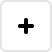
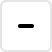
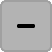
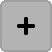
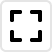
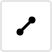
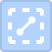
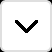
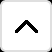
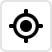
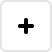
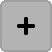
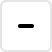
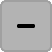
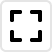
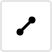
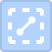
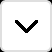
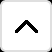
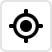

In [2]:
LetsPlot.setup_html()

In [3]:
data = {
    'x': [1, 2, 3, 4],
    'y': [1, 1, 1, 1],
    'angle': [-30, 0, 30, 60]
}

In [4]:
ggplot(data) +\
geom_point(aes(x='x', y='y', angle='angle'), size=20, shape=3.0) +\
geom_point(x=5, y=1.0, angle=90, size=20, shape=2.0, color='red')

### Circles must not rotate in target SVG

In [5]:
p = ggplot(data) +\
geom_point(aes(x='x', y='y', angle='angle'), size=20, shape='SOLID_CIRCLE_2') +\
geom_point(x=5, y=1.0, angle=90, size=20, shape=2.0, color='red')
#p.to_svg('1.svg')
p.show()

In [6]:
import pandas as pd

from sklearn.datasets import fetch_california_housing

california_housing_bunch = fetch_california_housing()
data = pd.DataFrame(california_housing_bunch.data, columns=california_housing_bunch.feature_names)

# Add $-value field to the dataframe.
# dataset.target: numpy array of shape (20640,)
# Each value corresponds to the average house value in units of 100,000.
data['Value($)'] = california_housing_bunch.target * 100000
data['angle'] = (data['HouseAge'] - 25)/ 50 * 60
data.head()

data = data.sample(n=50)

from lets_plot.geo_data import *

CA = geocode_states('CA').scope('US').inc_res(2).get_boundaries()
CA.head()

The geodata is provided by © OpenStreetMap contributors and is made available here under the Open Database License (ODbL).


,state,found name,geometry
0,CA,California,"MULTIPOLYGON (((-124.32694 40.61620, -124.3118..."


In [7]:
# The plot base 
p = ggplot()\
  + theme(axis='blank', panel_grid='blank')\
  + scale_fill_brewer(palette="PiYG", direction=-1)\
  + scale_size(range=[5, 15])\
    

# The points layer
points = geom_point(aes(x='Longitude',
                        y='Latitude',
                        angle='angle',
                        size='Value($)',                        
                        color='HouseAge'), 
                    data=data,
                    shape = 24,
                    alpha=0.8)

# The map
p + geom_polygon(data=CA, fill='#F8F4F0', color='#B71234')\
  + points\
  + ggsize(650, 600)

In [8]:
n = 10
np.random.seed(42)
x = np.random.normal(0, 1, n)
y = np.random.normal(1, 2, n)
angle = 180 * x ** 2 + np.random.normal(n)

ggplot({'x': x, 'y': y, 'angle': angle}) + geom_qq2(aes(x='x', y='y', angle='angle'), shape=24)

In [9]:
np.random.normal(180, 180, n)

array([139.36026591, 192.15507684, -76.45467352,  82.01110959,
       199.96606615, -27.17884394, 247.6256433 ,  71.88503581,
       127.49512504,  71.6928098 ])

In [10]:
np.random.seed(42)
n = 100
x = np.random.uniform(-1, 1, size=n)
y = 25 * x ** 2 + np.random.normal(size=n)
angle = 180 * y / 25

ggplot({'x': x, 'y': y, 'angle': angle}) + \
    geom_point(aes(x='x', y='y', fill='y', angle='angle'), \
               shape=22, size=5, color='white')